In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA


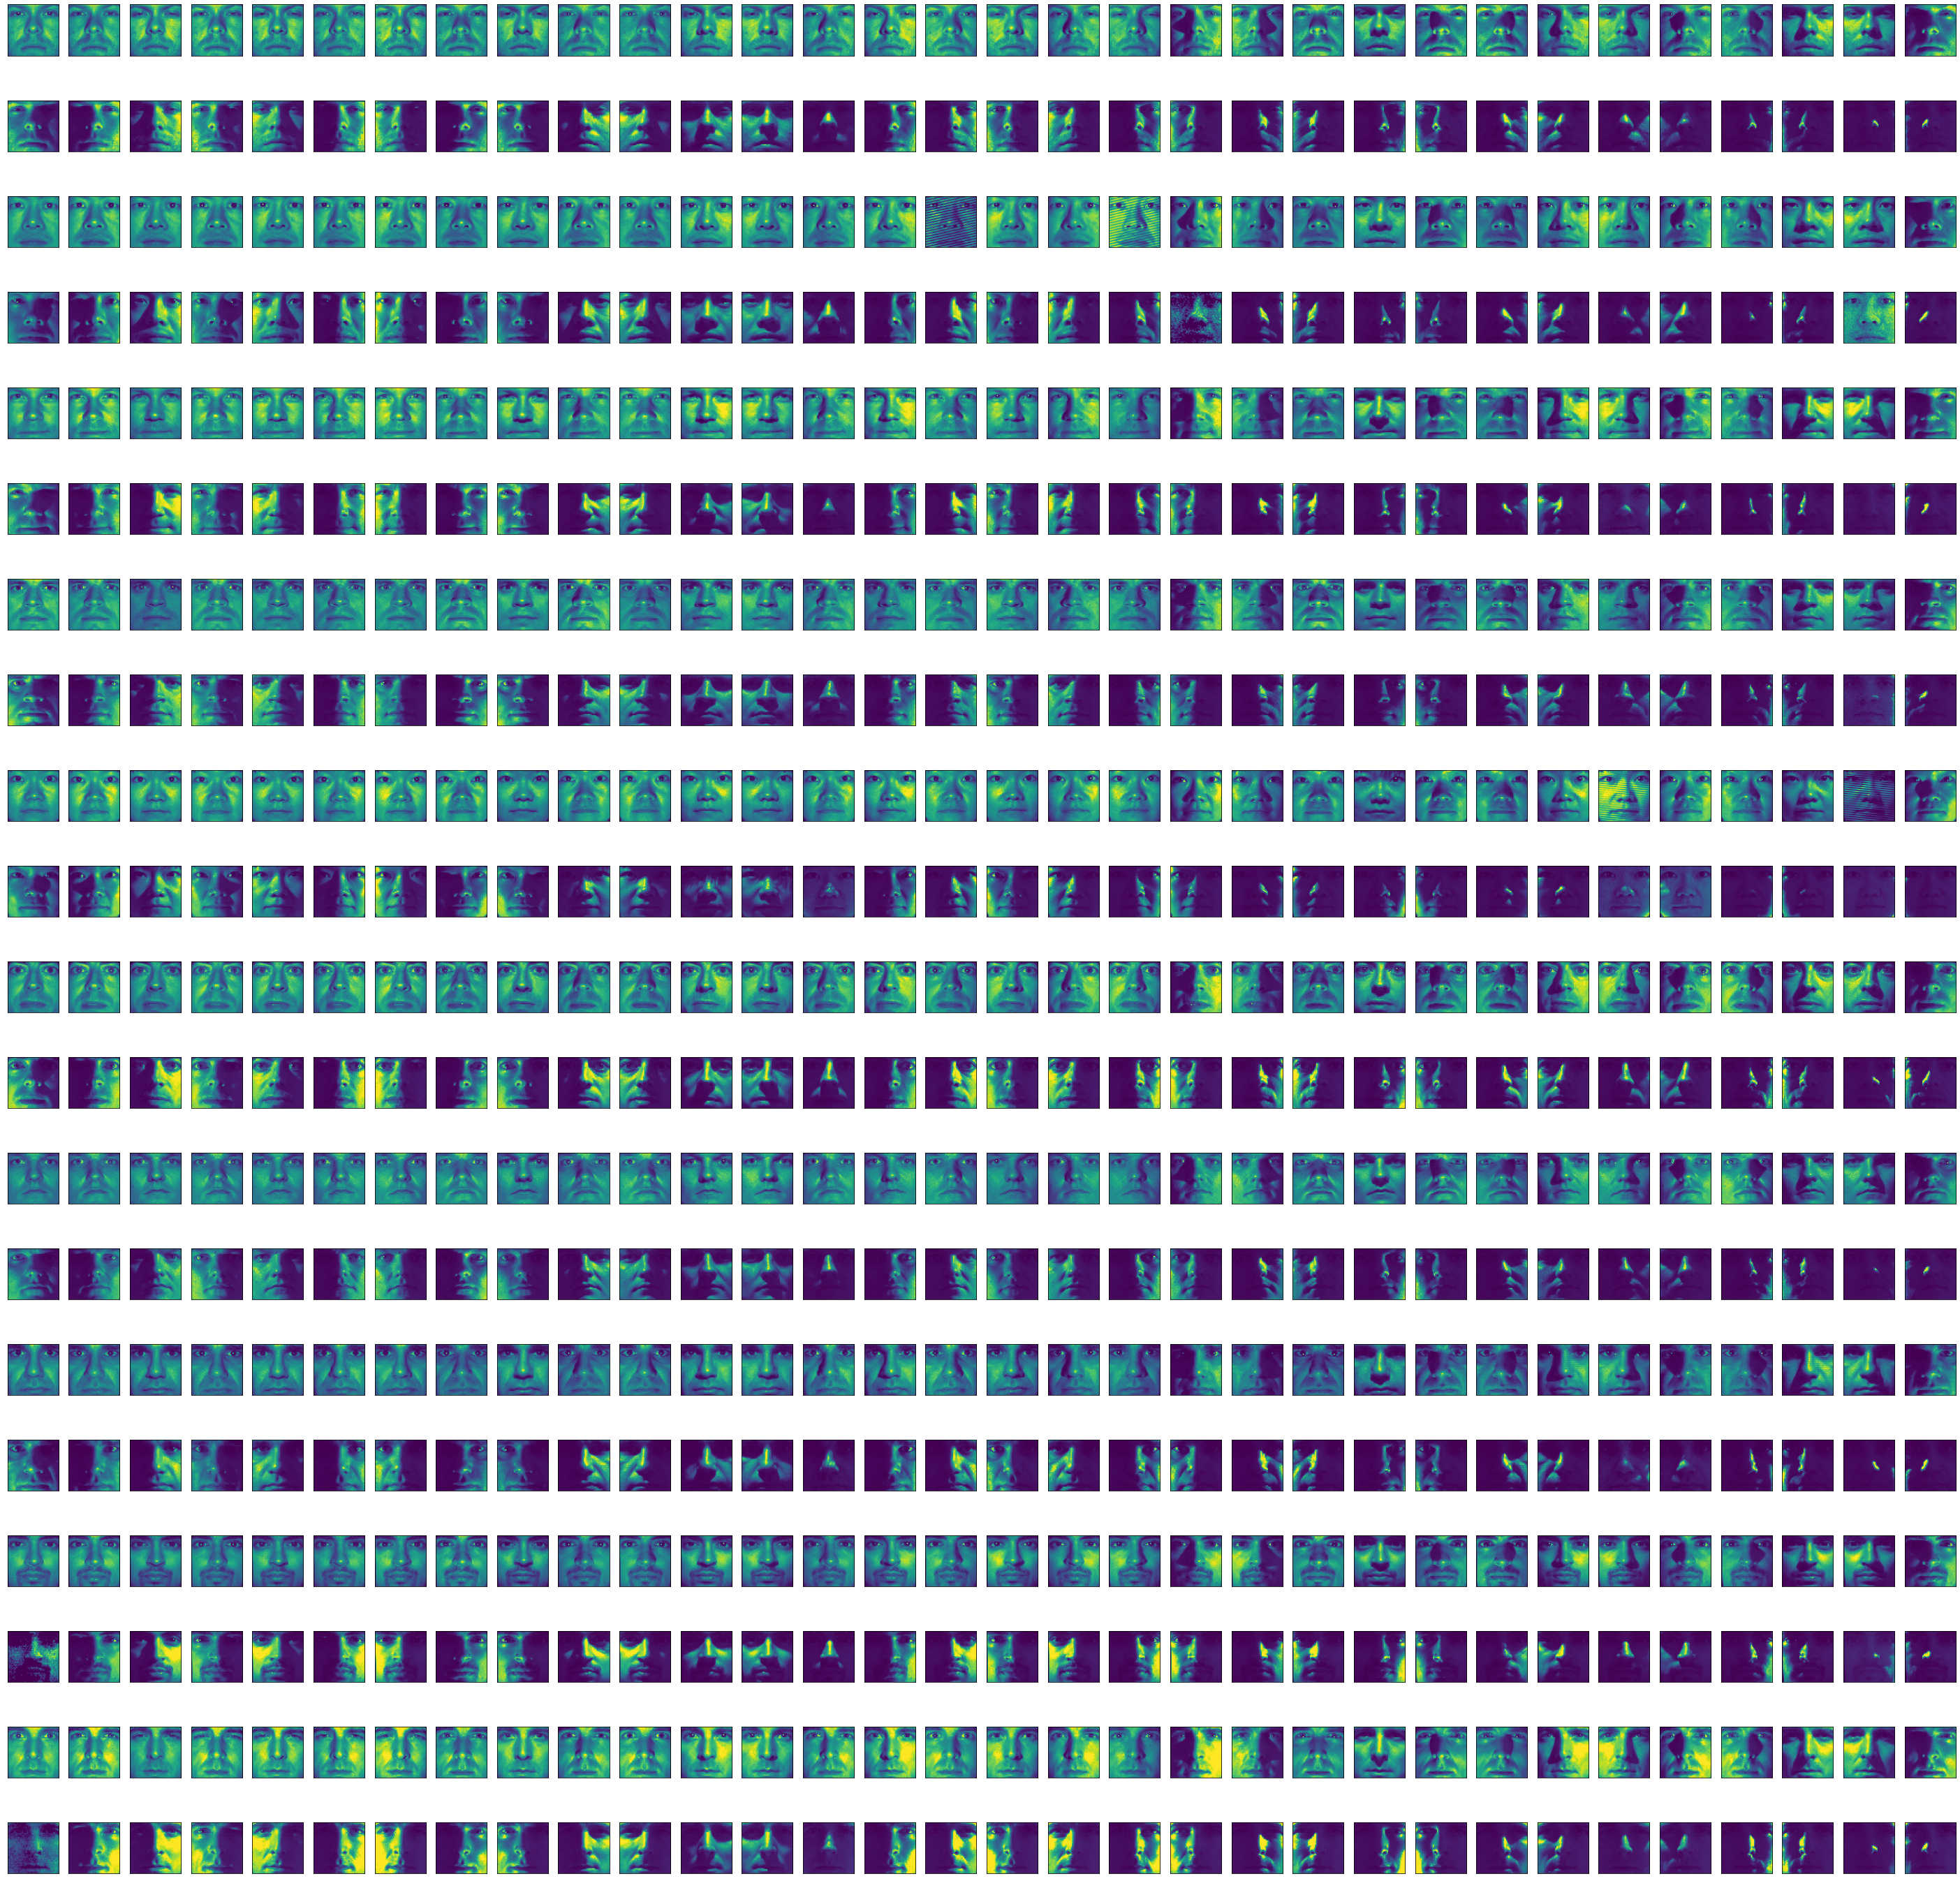

In [4]:
### Data loading and plotting the image ###
data = loadmat('face_data.mat')
# print(data)

image = data['image'][0]

person_id = data['personID'][0]

subset_id = data['subsetID'][0]

fig = plt.figure(figsize=(50, 50))
for i in range(len(image)):
    ax = fig.add_subplot(20, 32, i + 1, xticks=[], yticks=[])
    ax.imshow(image[i])  

In [5]:
def pca_fun(input_data, target_d=200):

    # P: d x target_d matrix containing target_d eigenvectors
    input_data = input_data - input_data.mean(axis=0)
    covariance = np.cov(input_data,rowvar = False)
    e_values,e_vectors = LA.eig(covariance)
    index = np.argsort(e_values)[::-1]
    e_values = e_values[index]
    e_vectors = e_vectors[:,index]
    P = e_vectors[:,:target_d]
    return P

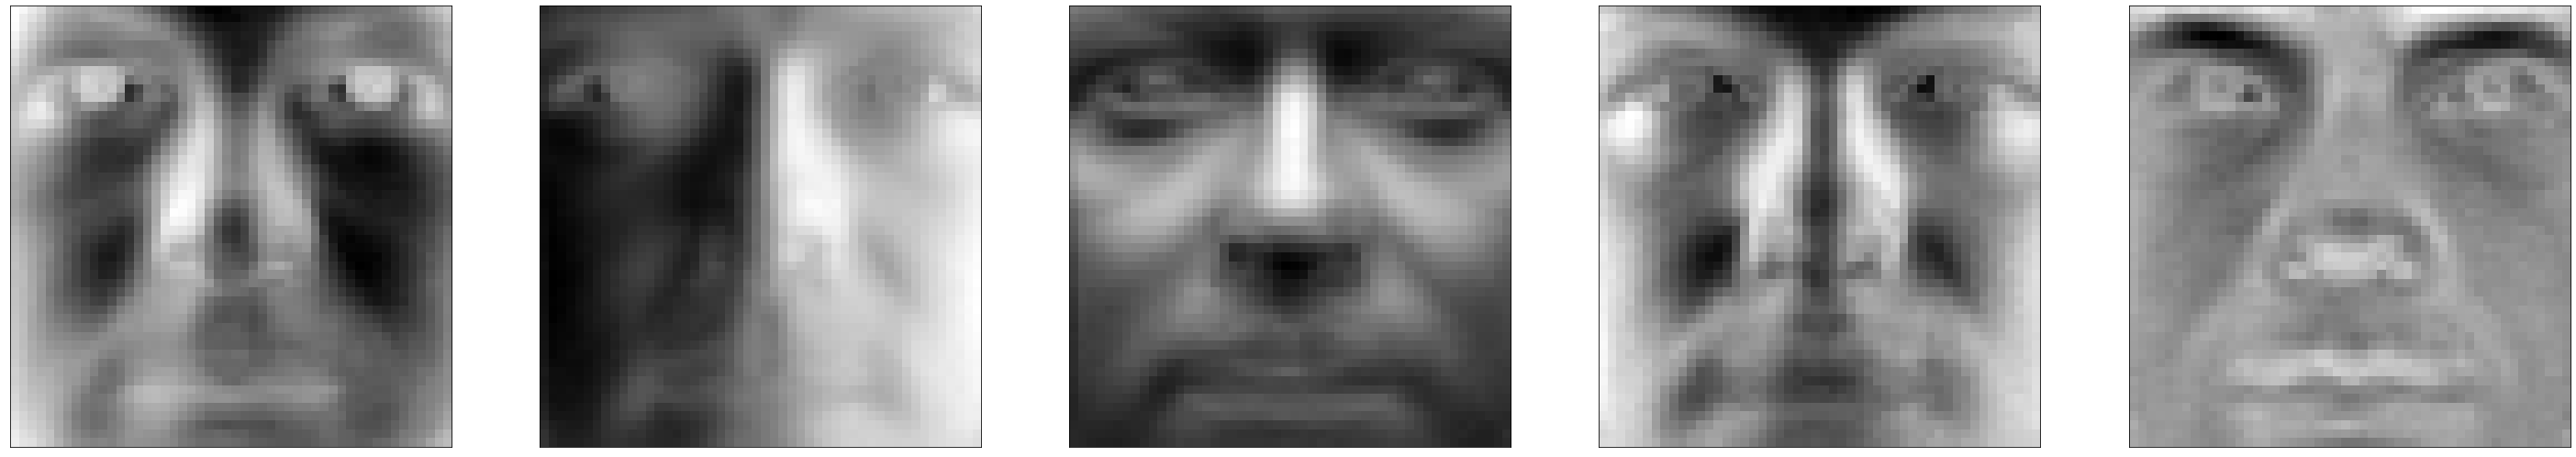

In [6]:
y = np.array([],dtype=float)
for i in range(len(image)):
    x = image[i].flatten()[:,np.newaxis]
    y = np.append(y,x)

z = y.reshape(640,2500)
p = pca_fun(z,200)
eigenfaces =np.array(p)


fig = plt.figure(figsize=(50, 50))
for i in range(0,5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.real(eigenfaces[:,i].reshape(50,50)),cmap='gray')
